In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
import pandas, random, numpy
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import PIL
from sklearn.model_selection import train_test_split



In [ ]:
civs_path = r'sample_data/cars'
print("path:", civs_path)
paths = glob.glob(civs_path + "/*.jpg") # Grabbing all the image file names
print(paths)


path: sample_data/cars
['sample_data/cars/az_co0_h350_w200_br5_typ4.jpg', 'sample_data/cars/az_co2_h240_w180_br8_typ1.jpg', 'sample_data/cars/az_co0_h258_w100_br0_typ0.jpg', 'sample_data/cars/az_co2_h300_w150_br1_typ2.jpg', 'sample_data/cars/az_co5_h300_w350_br4_typ4.jpg', 'sample_data/cars/az_co0_h300_w200_br2_typ1.jpg', 'sample_data/cars/az_co4_h150_w100_br3_typ4.jpg', 'sample_data/cars/az_co0_h400_w260_br6_typ3.jpg', 'sample_data/cars/az_co0_h250_w150_br4_typ0.jpg', 'sample_data/cars/az_co2_h200_w350_br7_typ3.jpg']


In [ ]:
n_images = len(paths)
rand_idxs = np.random.permutation(n_images)
paths_subset = np.random.choice(paths, n_images , replace=False)
all_paths = paths_subset[rand_idxs]
print(n_images)

10


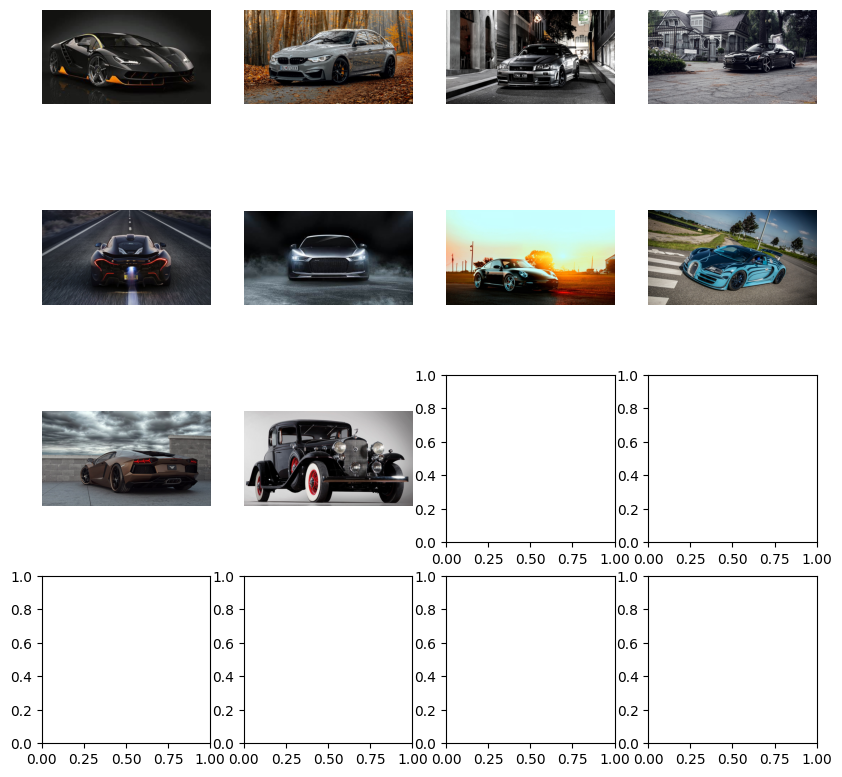

In [ ]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [ ]:
def label_func2(fname):
    fname = fname.replace('sample_data/cars/', "")
    temp_name = fname.replace(".jpg", "").split("_")

    # Extract attributes from the filename
    # y0: color, y1: height, y2: width, y3: brand, y4: model/type


    # Check if the color attribute is correctly extracted before converting to float
    y0 = temp_name[0]                              ## az
    y1 = float(temp_name[1].replace("co", ""))     ## 'Ng0'
    y2 = float(temp_name[2].replace("h", ""))    ## 'Pci175'
    y3 = float(temp_name[3].replace("w", ""))     ## 'H0'
    y4 = float(temp_name[4].replace("br", ""))     ## 'Wp0'
    y5 = float(temp_name[5].replace("typ", ""))     ## 'type'

    return [fname, y0, y1, y2, y3, y4, y5]

In [ ]:
list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    my_img = Image.open(img_name)
    my_img = my_img.resize((474,266))
    my_img = ImageOps.grayscale(my_img)
    img_np = np.array(my_img)
    ## img_np = img_np.reshape(-1)

    temp_label_vector_rc = label_func2(img_name)
    if temp_label_vector_rc[1] == "az":

        ## print(img_np.shape)
        list_imgs.append(img_np)

        list_label_vectors.append( temp_label_vector_rc )


In [ ]:
X =  list_imgs
y =  list_label_vectors

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

8
2
8
2


array([[ 44,  43,  42, ...,  55,  58,  58],
       [ 45,  44,  42, ...,  55,  58,  58],
       [ 46,  45,  43, ...,  55,  59,  59],
       ...,
       [116, 130, 144, ...,  69,  77,  77],
       [150, 144, 131, ...,  60,  64,  81],
       [150, 144, 131, ...,  60,  64,  81]], dtype=uint8)
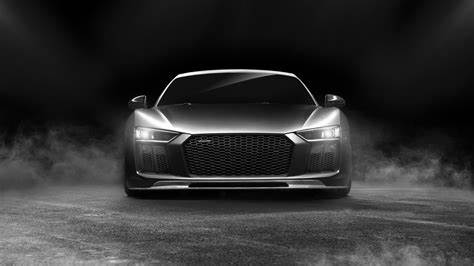

In [ ]:
X_train[0]


In [ ]:
list_ids_train      = []
list_features_train = []
list_imgs_train     = []


for index in range(len(X_train)):

    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (5) )

    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
    target[ 4 ] = reg_vals[6]


    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0



    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )

array([[ 44,  43,  42, ...,  55,  58,  58],
       [ 45,  44,  42, ...,  55,  58,  58],
       [ 46,  45,  43, ...,  55,  59,  59],
       ...,
       [116, 130, 144, ...,  69,  77,  77],
       [150, 144, 131, ...,  60,  64,  81],
       [150, 144, 131, ...,  60,  64,  81]], dtype=uint8)
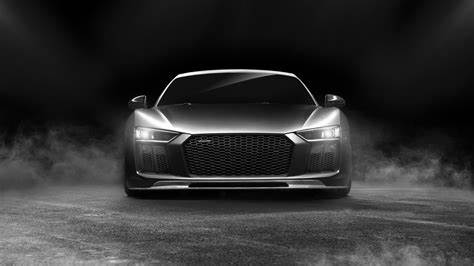

In [ ]:
list_imgs_train[0]


In [ ]:
list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):

    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (5) )

    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
    target[ 4 ] = reg_vals[6]


    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0

    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )

In [ ]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [ ]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(8, 5)
(2, 5)


In [ ]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")

In [ ]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")

In [ ]:
list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]



In [ ]:
list_imgs_train_stretched[0]


array([44, 43, 42, ..., 60, 64, 81], dtype=uint8)

In [ ]:
list_imgs_train_stretched[4].shape


(126084,)

In [ ]:
list_imgs_train_stretched[4][:1000]


array([210, 210, 210, 210, 208, 207, 208, 206, 206, 206, 207, 207, 207,
       206, 206, 205, 205, 204, 204, 205, 205, 205, 204, 204, 206, 204,
       204, 204, 204, 201, 202, 203, 202, 202, 202, 201, 202, 202, 201,
       201, 202, 200, 200, 201, 200, 199, 199, 198, 199, 199, 199, 199,
       200, 200, 199, 198, 198, 199, 199, 199, 199, 199, 199, 199, 198,
       198, 198, 198, 198, 198, 198, 198, 197, 197, 197, 197, 197, 197,
       196, 197, 197, 198, 198, 196, 197, 197, 197, 196, 197, 197, 196,
       197, 197, 197, 197, 197, 198, 197, 198, 197, 198, 198, 198, 199,
       199, 199, 198, 198, 199, 199, 199, 199, 199, 198, 198, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 200, 199, 200, 200, 200, 200, 200, 199, 200, 200, 199,
       199, 200, 200, 199, 199, 199, 200, 200, 200, 200, 200, 200, 200,
       199, 199, 200, 200, 200, 200, 200, 199, 200, 200, 199, 199, 199,
       199, 200, 200, 201, 202, 200, 201, 201, 202, 202, 202, 20

In [ ]:
list_imgs_train_stretched[7].shape


(126084,)

In [ ]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )


In [ ]:
np_list_imgs_train_stretched.shape


(8, 126084)

In [ ]:
np_list_imgs_train_stretched[3]


array([192, 203, 210, ...,  35,  34,  34], dtype=uint8)

In [ ]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)


In [ ]:
DF_imgs_np_train


,0,1,2,3,4,5,6,7,8,9,...,126074,126075,126076,126077,126078,126079,126080,126081,126082,126083
0,44,43,42,39,37,35,33,32,32,31,...,66,68,68,67,71,75,69,60,64,81
1,18,18,18,18,18,18,18,18,18,18,...,29,29,29,29,29,29,29,29,31,65
2,0,0,0,3,8,2,1,2,2,1,...,37,39,41,38,37,36,32,37,36,36
3,192,203,210,220,227,231,238,243,246,250,...,44,43,41,40,36,34,34,35,34,34
4,210,210,210,210,208,207,208,206,206,206,...,99,97,98,98,98,96,95,95,95,94
5,28,27,27,27,28,30,31,33,33,34,...,47,45,45,39,37,45,50,48,49,57
6,182,180,152,162,69,73,57,35,38,91,...,93,112,117,90,92,117,102,108,121,108
7,235,236,236,236,236,237,237,237,237,237,...,14,24,19,17,24,22,16,13,18,23


In [ ]:
DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")
